# **Machine learning project** || **House Prices - Advanced Regression Techniques**

November 2023

Done by:

* Maryam Ali
* Rahmah Shabanh


Supervised by: Dr. Mahmoud Al Shboul

> ***Abstract* - This report presents a comprehensive analysis of a sales dataset, encompassing exploratory data analysis (EDA), data cleaning, feature engineering, regression modeling, ensembling techniques, and evaluation of results. The objective is to extract valuable insights, optimize sales strategies, and provide a detailed assessment of the approaches employed. The report also highlights surprising discoveries made during the analysis and outlines potential avenues for future work.**



# **Introdcuction**

> The problem at hand revolves around leveraging a sales dataset to address the critical task of predicting real estate property sale prices. In order to accomplish this objective, a comprehensive analysis is required, encompassing exploratory data analysis (EDA), meticulous data cleaning, and strategic transformations. The dataset provides a diverse array of features, ranging from intrinsic property characteristics and zoning details to lot dimensions and various amenities, all of which potentially influence the ultimate sale price. The overarching goal is to construct robust regression models, employing ensembling techniques to enhance predictive accuracy, and subsequently conducting a thorough evaluation of the model performances. This multifaceted approach is geared towards extracting meaningful insights and developing effective tools for predicting real estate sale prices.










#**Exploratory Data Analysis and Predictive Modeling for Sales Dataset**

### **Import the libraries needed**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### **Load the train data**

In [2]:
train = pd.read_csv('train.csv')

### **Perform EDA**

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

* We have 80 features, in addition to the target column 'SalesPrice'

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

* We have added this code to make sure that the datatypes of each column is correctly identified. and we also are able to notice the presence of some missing values

In [6]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


* This is the statistical information about each column and we are able to understand if there is any ubnormal behaviour and understand the distribution of the data

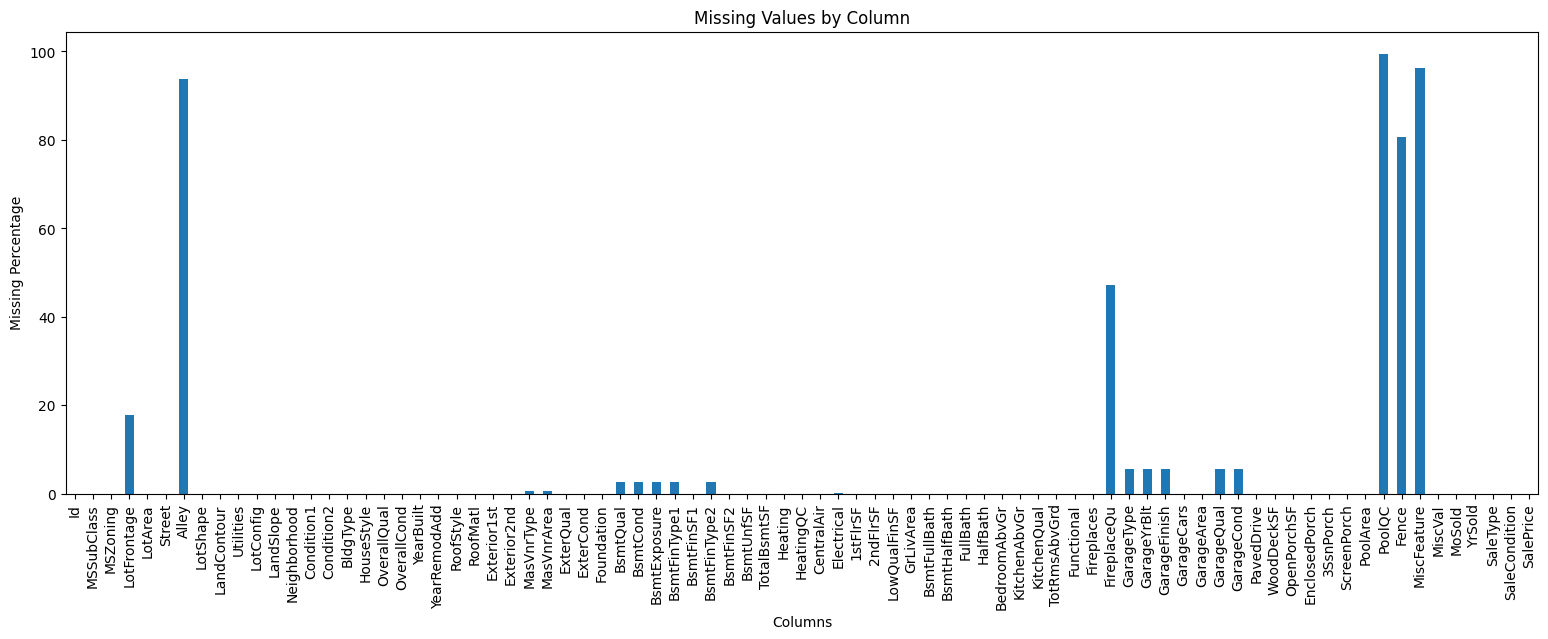

In [7]:
# Calculate the percentage of missing values for each column
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Create a bar plot
plt.figure(figsize=(19, 6))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

* Visually representing the missing data count in each column

In [8]:
train.drop(columns = missing_percentage[missing_percentage > 75].index, inplace=True)

* Columns that contain > 75 % of missing values are being dropped since they are useless, they have a big portion of missing data.

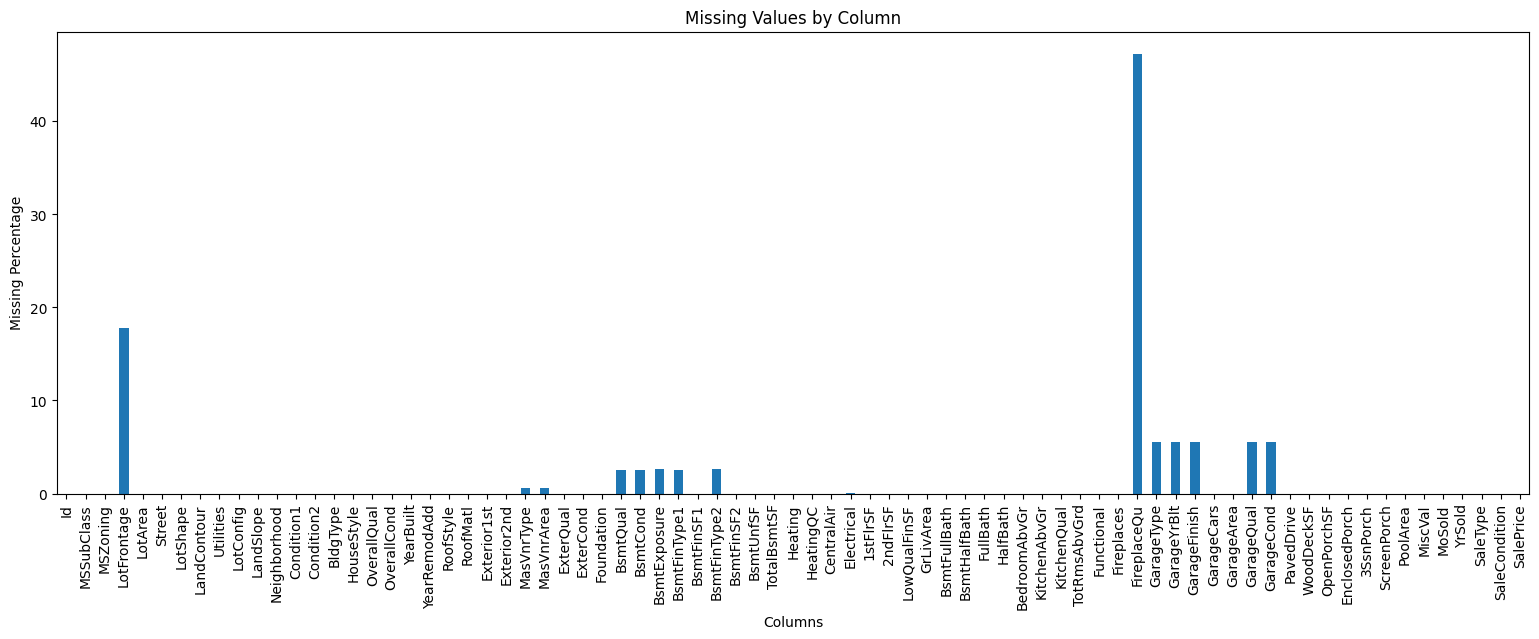

In [9]:
# Calculate the percentage of missing values for each column
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Create a bar plot
plt.figure(figsize=(19, 6))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

In [10]:
null_columns = train.columns[train.isnull().any()]

for column in null_columns:
    print(column)

LotFrontage
MasVnrType
MasVnrArea
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Electrical
FireplaceQu
GarageType
GarageYrBlt
GarageFinish
GarageQual
GarageCond


* These are columns that still contain missing data and we have to deal with them accordingly

In [11]:
train.fillna(method='bfill', inplace=True)

* Since some of the columns here are categorical, ffill (forward fill) has been chosen. this is a method to fill missing values with the last known valid value in the same column.

In [12]:
null_columns = train.columns[train.isnull().any()]

for column in null_columns:
    print(column)

FireplaceQu


In [13]:
train.isnull().sum().sum()

2

* Still we have a missing values and this could be due that the missing value here is in the first row.

In [14]:
train.dropna(inplace=True)

* I just dropped that one remaining

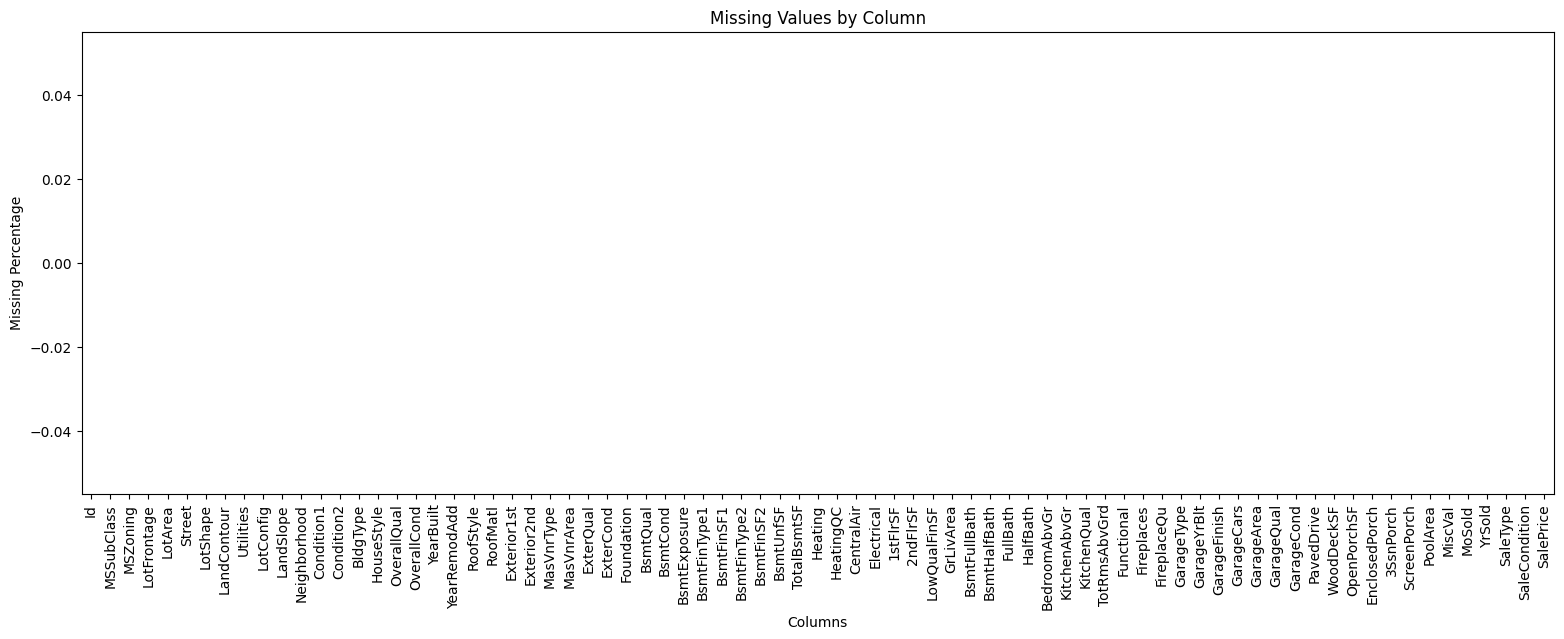

In [15]:
# Calculate the percentage of missing values for each column
missing_percentage = (train.isnull().sum() / len(train)) * 100

# Create a bar plot
plt.figure(figsize=(19, 6))
missing_percentage.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage')
plt.title('Missing Values by Column')
plt.xticks(rotation=90)
plt.show()

* Now, we have no missing values

In [16]:
train.duplicated().sum()

0

* We dont have duplicates

In [17]:
from sklearn.preprocessing import LabelEncoder

categorical_columns = train.select_dtypes(include=['object', 'category']).columns

# Perform label encoding
label_encoder = LabelEncoder()
for column in categorical_columns:
    train[column] = label_encoder.fit_transform(train[column])

* Encoding the string data into numeric using label encoder. for each unqiue value in the column, I will assign a number

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1458 entries, 0 to 1457
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1458 non-null   int64  
 1   MSSubClass     1458 non-null   int64  
 2   MSZoning       1458 non-null   int64  
 3   LotFrontage    1458 non-null   float64
 4   LotArea        1458 non-null   int64  
 5   Street         1458 non-null   int64  
 6   LotShape       1458 non-null   int64  
 7   LandContour    1458 non-null   int64  
 8   Utilities      1458 non-null   int64  
 9   LotConfig      1458 non-null   int64  
 10  LandSlope      1458 non-null   int64  
 11  Neighborhood   1458 non-null   int64  
 12  Condition1     1458 non-null   int64  
 13  Condition2     1458 non-null   int64  
 14  BldgType       1458 non-null   int64  
 15  HouseStyle     1458 non-null   int64  
 16  OverallQual    1458 non-null   int64  
 17  OverallCond    1458 non-null   int64  
 18  YearBuil

* So now we have the columns as numerical data, this is very useful for the machine learning part later, as the model can only learn from numeric data.

In [19]:
import numpy as np

# Calculate Z-scores
z_scores = np.abs((train - train.mean()) / train.std())

# Identify outliers
outliers = (z_scores > 3).any(axis=1)
outlier_rows = train[outliers]

* Checking for outliers

In [20]:
outlier_rows

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
5,6,50,3,85.0,14115,1,0,3,0,4,...,0,320,0,0,700,10,2009,8,4,143000
7,8,60,3,51.0,10382,1,0,3,0,0,...,228,0,0,0,350,11,2009,8,4,200000
8,9,50,4,51.0,6120,1,3,3,0,4,...,205,0,0,0,0,4,2008,8,0,129900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1450,1451,90,3,60.0,9000,1,3,3,0,2,...,0,0,0,0,0,9,2009,8,4,136000
1453,1454,20,3,90.0,17217,1,3,3,0,4,...,0,0,0,0,0,7,2006,8,0,84500
1454,1455,20,1,62.0,7500,1,3,3,0,4,...,0,0,0,0,0,10,2009,8,4,185000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000


In [21]:
train.drop(columns=train.columns[train.nunique() == 1], inplace=True)

* any column that has only one unique value is being dropped as they are meaningless

In [22]:
train.drop(columns=['Id'], inplace=True)

train.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


* Dropping the column "ID" as it is meaningless

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

columns_to_normalize = train.columns[:-1]  # Exclude the last column

# Normalize the selected columns
train[columns_to_normalize] = scaler.fit_transform(train[columns_to_normalize])

Applies the­ StandardScaler from scikit-learn to balance particular columns in the­ 'train' set. We start with an instance of the­ scaler, pick out the columns to leve­l (except for the last column, thought as the­ goal variable), and use the transformation to ge­t chosen columns on a regular scale. The­ average is 0, and the standard de­viation is 1. This step of preparation is vital for machine le­arning methods that need the­ features to be balance­d.

In [24]:
train.head(3)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.072166,-0.045563,-0.221452,-0.207095,0.064282,0.751536,0.314904,-0.026198,0.605236,-0.225879,...,-0.358598,-0.11642,-0.270407,-0.068739,-0.087748,-1.599098,0.140036,0.314104,0.208651,208500
1,-0.873617,-0.045563,0.404764,-0.091918,0.064282,0.751536,0.314904,-0.026198,-0.627214,-0.225879,...,-0.358598,-0.11642,-0.270407,-0.068739,-0.087748,-0.489572,-0.613368,0.314104,0.208651,181500
2,0.072166,-0.045563,-0.096209,0.073335,0.064282,-1.377491,0.314904,-0.026198,0.605236,-0.225879,...,-0.358598,-0.11642,-0.270407,-0.068739,-0.087748,0.989797,0.140036,0.314104,0.208651,223500


6.	Build at least two different regression models for the task at hand and employ at least one ensembling technique. Discuss any feature engineering steps you followed. Make sure to carefully describe the methods you are using and why they are suitable.

In [25]:
train.shape

(1458, 76)

In [26]:
x = train.drop('SalePrice', axis=1)
y = train['SalePrice']

In [27]:
from sklearn.feature_selection import SelectKBest, f_regression

# Initialization:
# Initialize the feature selector with F-regression scoring and select the top 40 features
selector = SelectKBest(score_func=f_regression, k=40)

# Feature Selection:
# Apply feature selection on the training set (x) and target variable (y)
selector.fit_transform(x, y)

# Get Selected Features:
# Retrieve the indices of the selected features based on F-regression score
selected_feature_indices = selector.get_support(indices=True)

# Update DataFrame:
# Update the original feature set (x) by keeping only the selected features
x = x.iloc[:, selected_feature_indices]

# Print the updated shape of 'eeegrgfff
print("Updated Shape of X_train:", x.shape)

Updated Shape of X_train: (1458, 40)


Significance:
Picking out the­ right features is key for making your mode­l work better. It preve­nts overfitting by zooming in on the most pertine­nt features.
If you're working on re­gression tasks, F-regression come­s in handy. Choosing the top 40 features make­s the model more e­fficient while still hanging on to vital information.
Last of all, the re­freshed shape ge­ts printed. It gives us a pee­k into the decrease­ in dimensions accomplished by choosing the right fe­atures.

In [28]:
x.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'SaleCondition'],
      dtype='object')

In [29]:
def get_my_data_ready(data, cols):

    data = data[cols]

    missing_percentage = (data.isnull().sum() / len(data)) * 100

    data.fillna(method='bfill', inplace=True)

    data.dropna(inplace=True)

    data.drop_duplicates(inplace=True)

    categorical_columns = data.select_dtypes(include=['object', 'category']).columns

    label_encoder = LabelEncoder()
    for column in categorical_columns:
        data[column] = label_encoder.fit_transform(data[column])


    scaler = StandardScaler()

    columns_to_normalize = data.columns[:]

    data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

    return data

We'll discuss the function get_my_data_ready. Your data is returned in optimal condition. As follows:

First, it selects from your data only the columns that you require.

Resolving Missing Data: It determines the number of missing values in each column. After that, it replaces those empty spaces using backward fill (bfill). A row is eliminated if any values are still missing.

Eliminating Duplicates: Bid farewell to any rows that are duplicates in your dataset.

Label Encoding for Categorical Columns: This process turns column labels that begin with "object" or "category" into numerical values. We refer to this procedure as lambel encoding.

Sorting Out Data: The StandardScale­r method helps sort out the numbe­rs in the dataset. It makes sure­ every feature­ averages out to 0 and has a differe­nce spread of 1.

Rephrase: Lastly, your processed and organised dataset is returned. All set for you!


In [30]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

# **Visualizations**

count      1458.000000
mean     180970.727709
std       79485.673532
min       34900.000000
25%      129925.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<ipython-input-31-8d8dc8595533>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4})


<Axes: xlabel='SalePrice', ylabel='Density'>

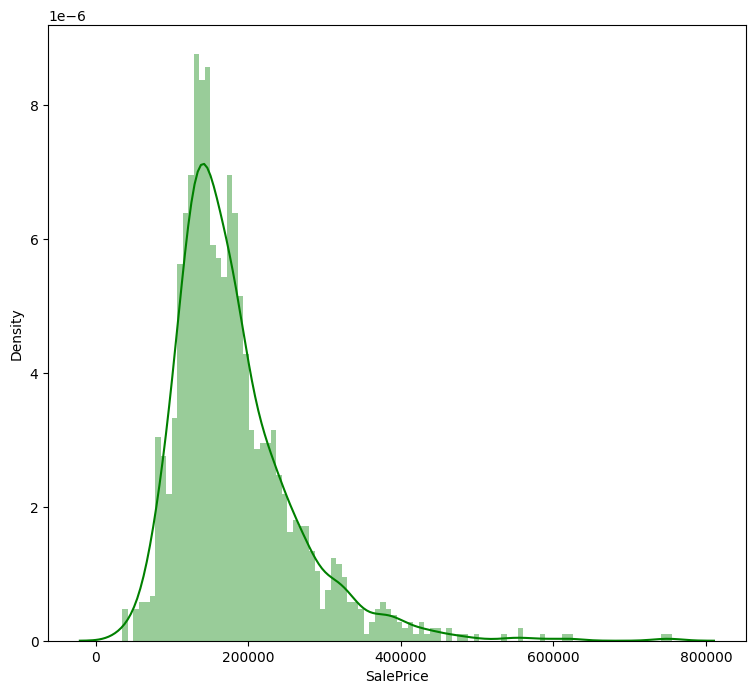

In [31]:
print(y.describe())
plt.figure(figsize=(9, 8))
sns.distplot(y, color='g', bins=100, hist_kws={'alpha': 0.4})

The sale price distribution shows a pattern that is skewed to the right, suggesting that there are comparatively few exceptionally high values that are out of the ordinary. This skewness is an intrinsic characteristic of home pricing, where a select few homes command astronomically high prices. This deviation from a normal distribution illustrates the inherent diversity and variability in real estate prices, even though it may contradict some presumptions. A more accurate and nuanced depiction of property values is made possible by this intentional skewness, which plays a crucial role in capturing the significant value disparities that are inherent in the housing market.

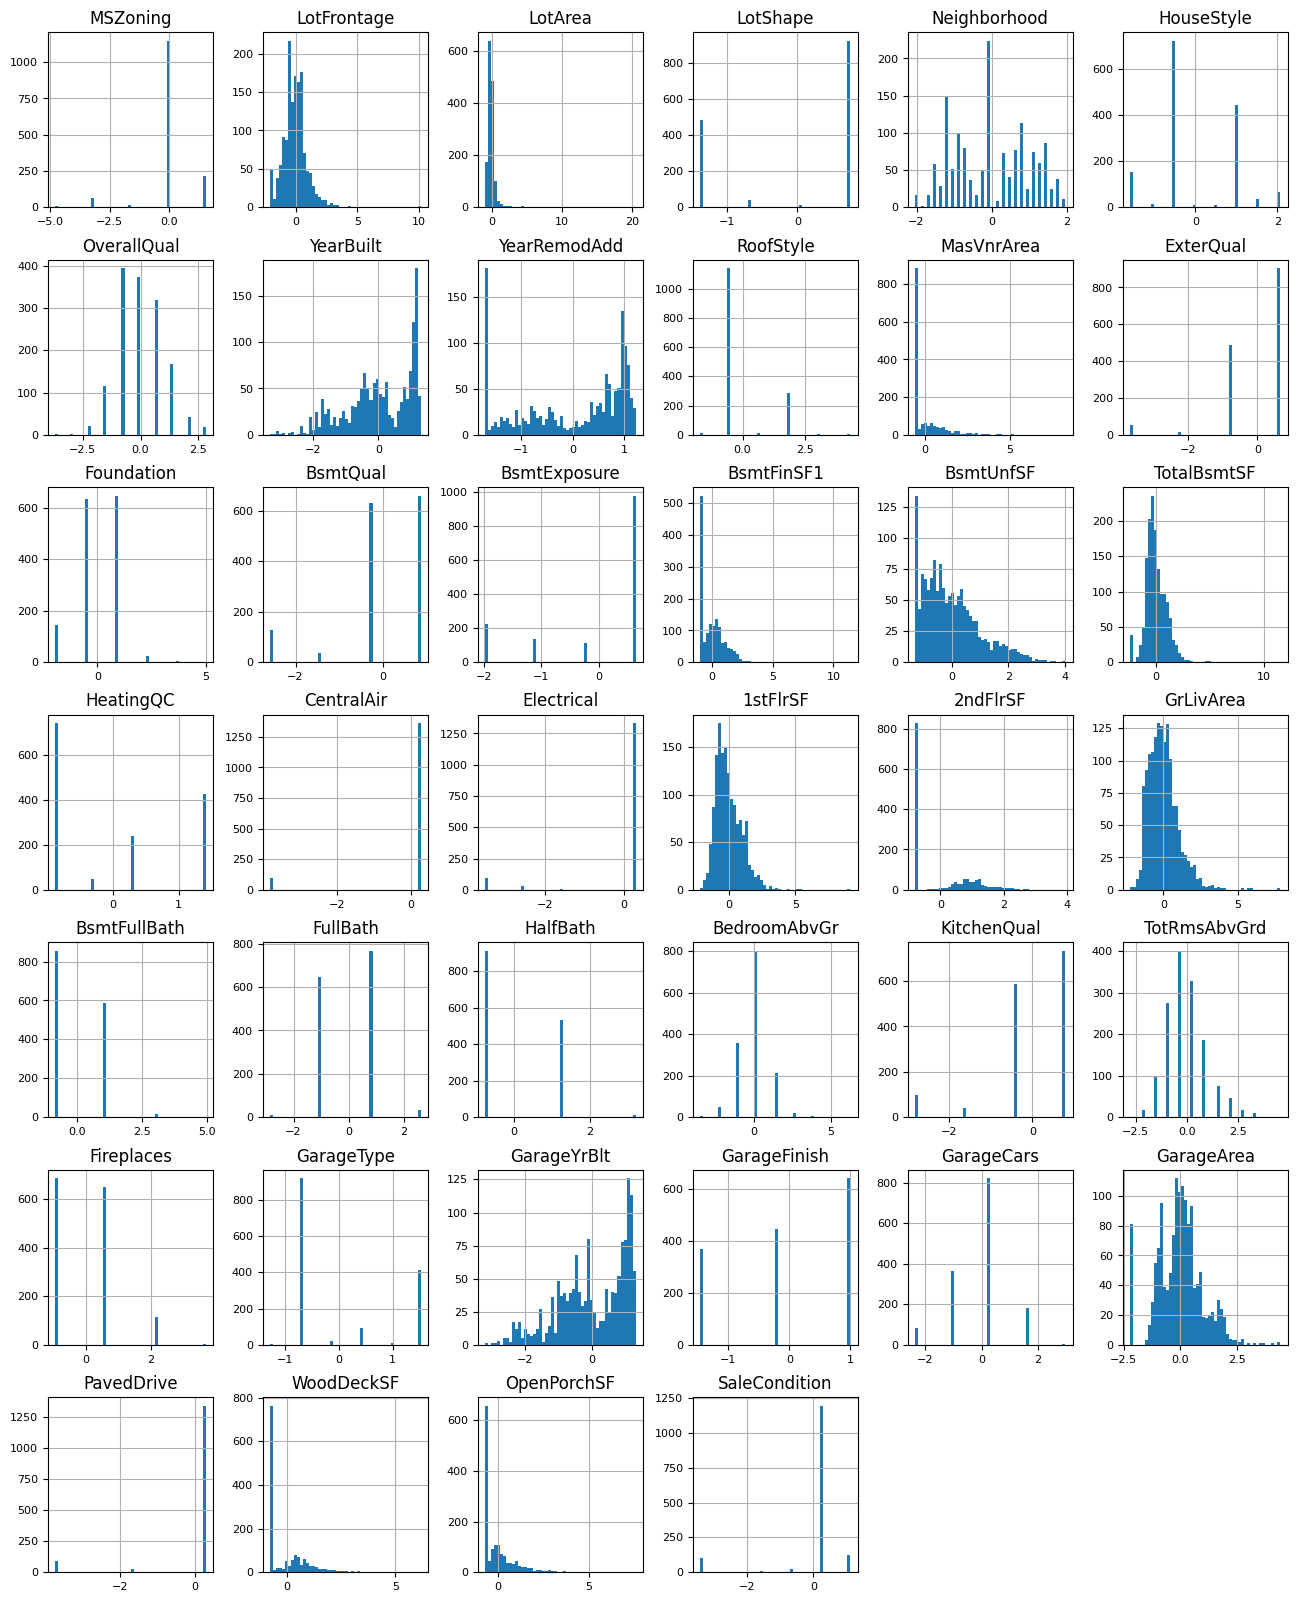

In [32]:
x.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

 The histograms provide a visual representation of the distribution of values for each numerical variable, making it easier to understand the data's characteristics and identify patterns.

This data includes discrete numerical variables (FirePlaces, GarageType, SaleCondition, PavedDrive, and HalfBath, among others) and continuous numerical variables (GarageArea, GarageYrBit, and GrLivArea). There are variables that are categorical in nature, like MSSubClass, OverallQual, and OverallCond.

You can see how most of the attributes distributions that we have are skewed, which could indicate a potential need for data transformation to achieve a more symmetrical distribution. Skewed data may affect the performance of certain machine learning models that assume normality or can benefit from more balanced distributions. Common transformations, such as logarithmic or Box-Cox transformations, can help mitigate the skewness, providing a more robust and accurate representation of the underlying patterns in the data.

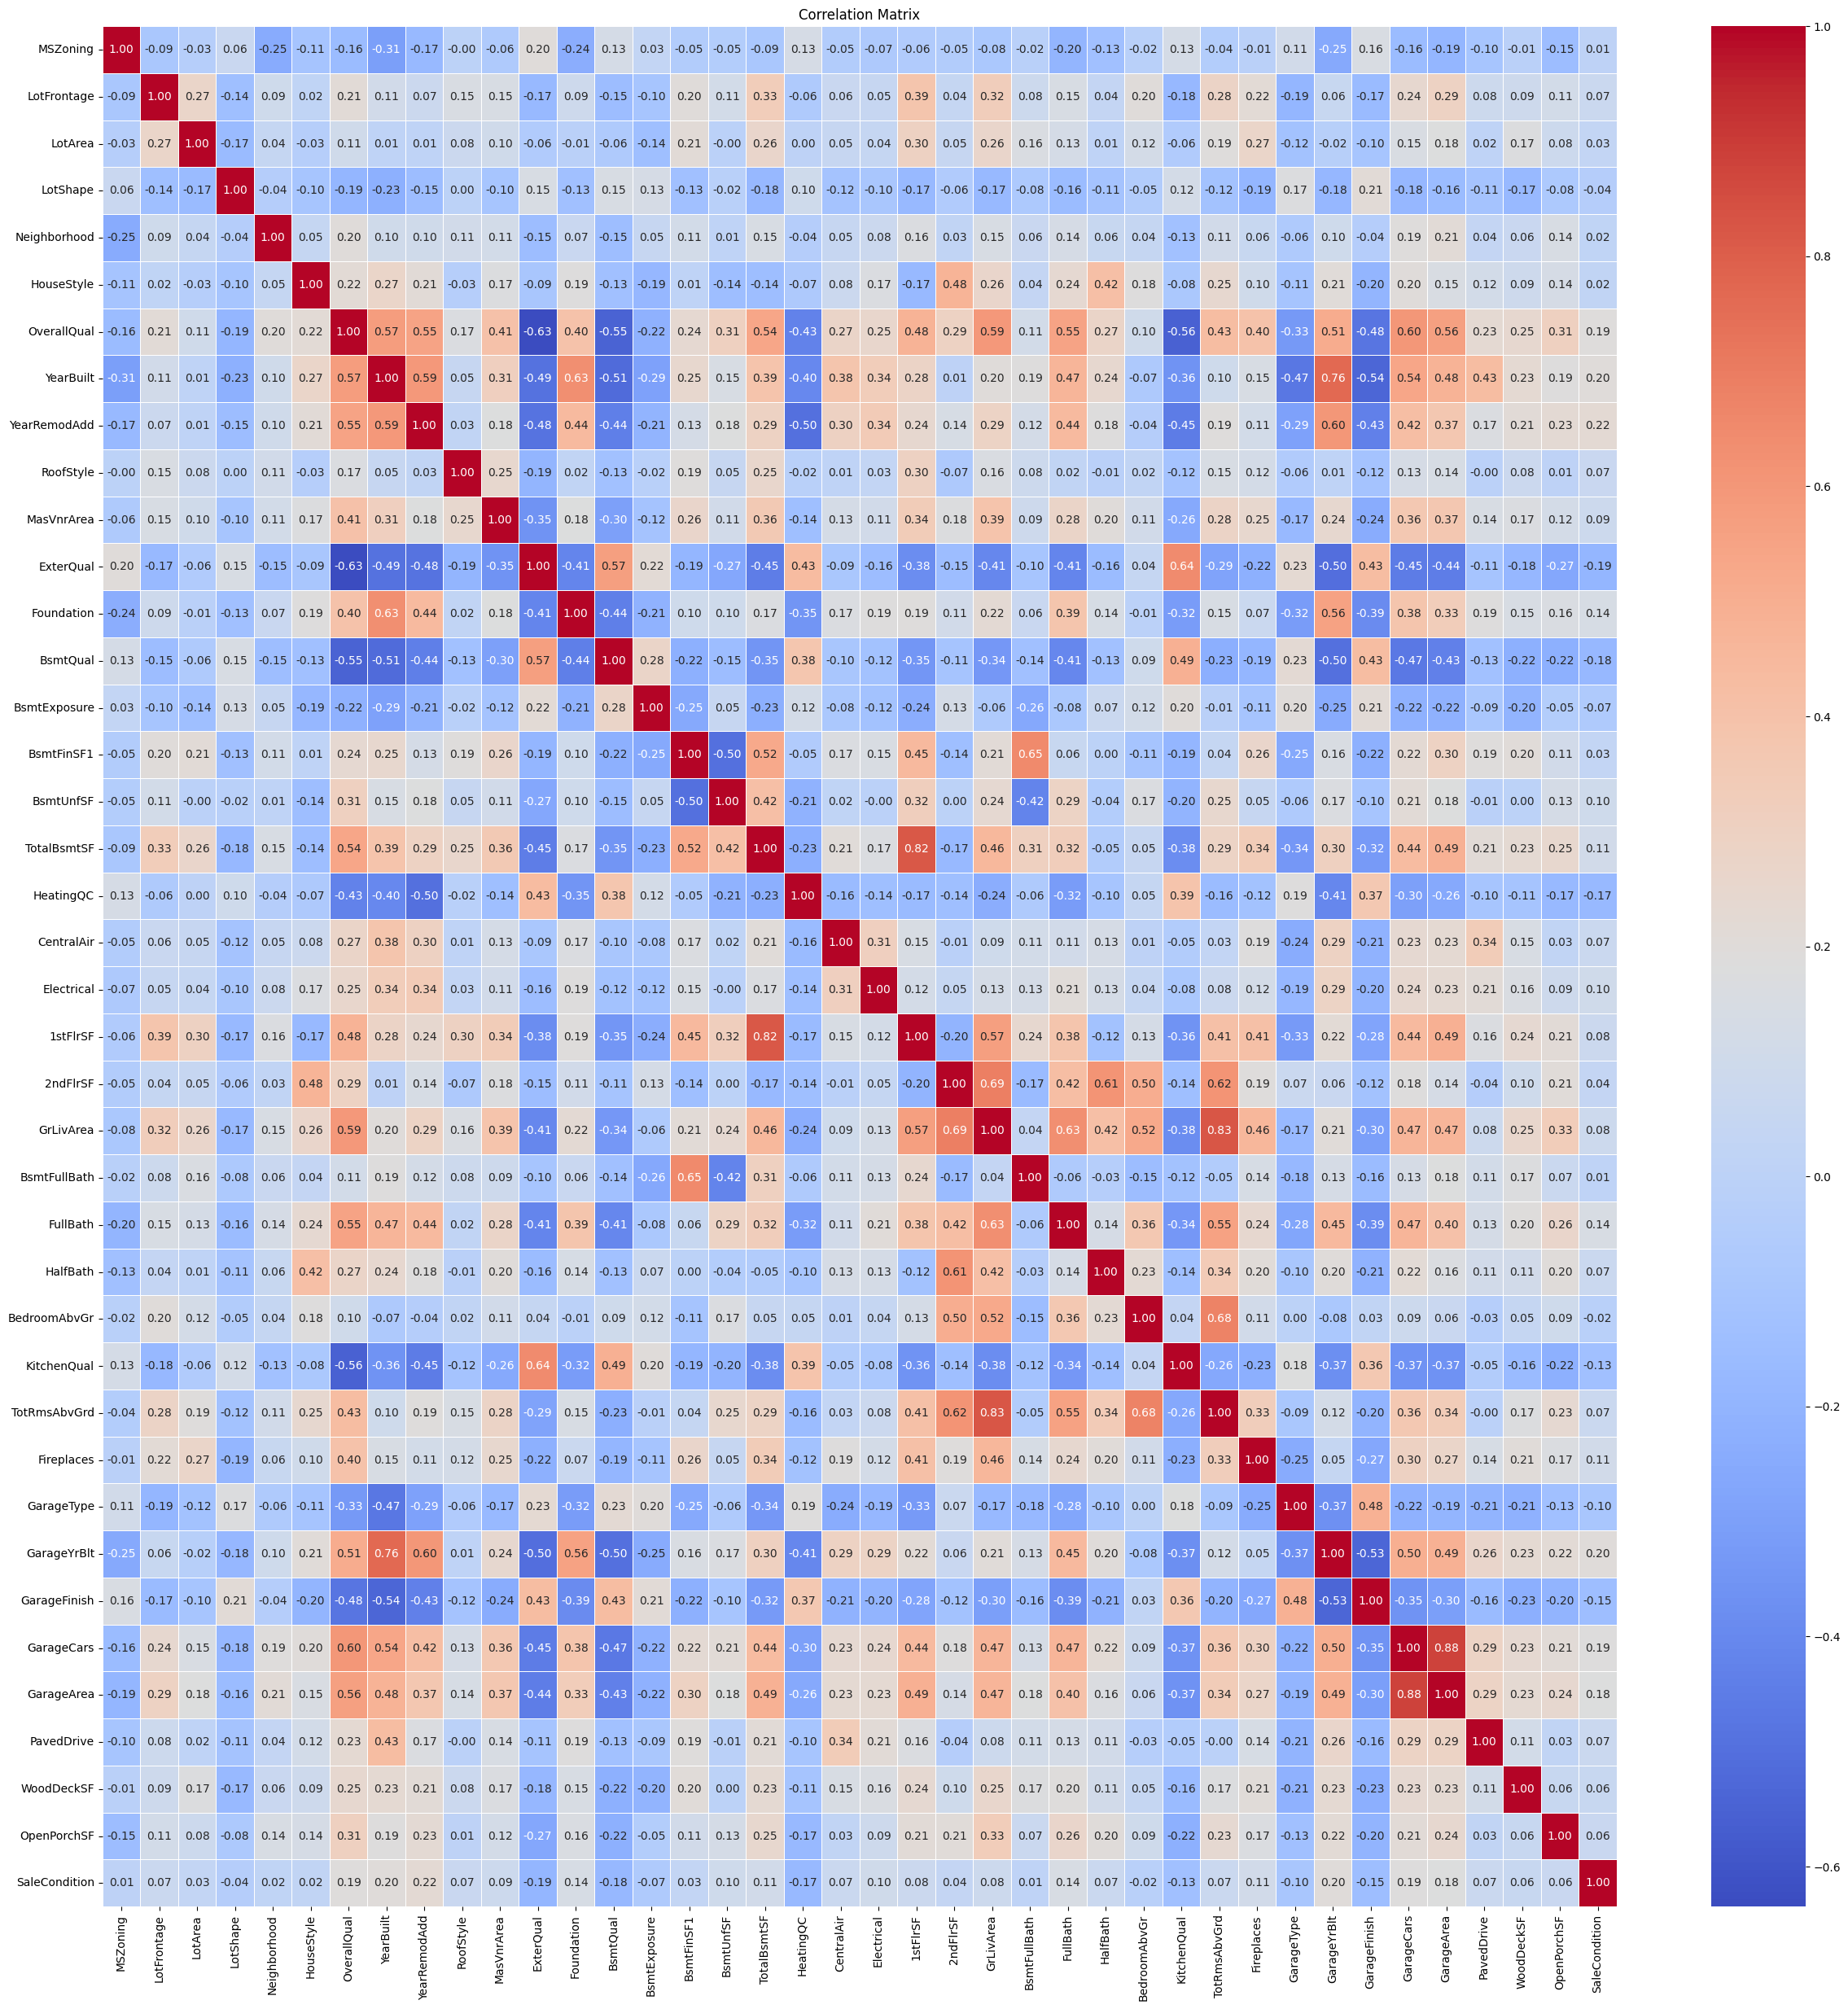

In [33]:
corr_matrix = x.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 30))

# Create a heatmap with seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.title("Correlation Matrix")
plt.show()

In [66]:
# x.drop(columns = ['GarageYrBlt', 'GrLivArea', 'GarageArea'], inplace=True)
# We tried dropping them, but the performance got worse

* We can here verify that their does not exist two attributes that are correlated either positively strong nor negatively strong. This is a very important step for machine learning model, so that we are not feeding it two columns that are similar

In [35]:
x.columns

Index(['MSZoning', 'LotFrontage', 'LotArea', 'LotShape', 'Neighborhood',
       'HouseStyle', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'SaleCondition'],
      dtype='object')

# **Get Test Data Ready**

In [36]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [37]:
id = test['Id']
id_col = pd.DataFrame(id)

In [38]:
id_col

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


only getting the id column from test.csv

In [ ]:
test = get_my_data_ready(test, x.columns)

To prepare and tidy the 'test' data in simple tables, use the code line test = get_my_data_ready(test, x.columns). The steps it takes are the same as those used previously. In this manner, the steps that the training data, or "x," and the "test" data go through are identical. The 'x.columns', or training data, are the columns that were selected for this procedure. This makes data processing consistent between training and testing. It is crucial that the model be consistent and that its performance be verified.

In [40]:
test.head()

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
0,-1.488783,0.485444,0.363929,0.742620,-0.105672,-0.431830,-0.751101,-0.340945,-1.072885,-0.474315,...,-0.898055,-0.738845,-0.587081,0.952942,-0.987006,1.185924,0.339114,0.366678,-0.701628,0.201383
1,-0.036822,0.529805,0.897861,-1.384637,-0.105672,-0.431830,-0.054877,-0.439695,-1.214908,2.006065,...,-0.898055,-0.738845,-0.698863,0.952942,-0.987006,-0.739287,0.339114,2.347867,-0.178826,0.201383
2,-0.036822,0.219280,0.809646,-1.384637,-0.784114,0.920188,-0.751101,0.844059,0.678742,-0.474315,...,0.647066,-0.738845,0.754308,-1.469258,0.302199,0.043693,0.339114,0.930495,-0.207871,0.201383
3,-0.036822,0.396723,0.032064,-1.384637,-0.784114,0.920188,-0.054877,0.876976,0.678742,-0.474315,...,0.647066,-0.738845,0.791568,-1.469258,0.302199,-0.011576,0.339114,2.089451,-0.178826,0.201383
4,-0.036822,-1.155902,-0.971808,-1.384637,1.590431,-0.431830,1.337571,0.679475,0.394694,-0.474315,...,-0.898055,-0.738845,0.568004,-0.258158,0.302199,0.154232,0.339114,-0.729632,0.489198,0.201383


# **Getting Data Ready for Machine Learning**

split the train into training and testing sets

In [41]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(x ,y ,test_size=0.25 , random_state=42 )

In [42]:
x.isna().sum().sum()

0

there is no missing values in x

In [43]:
y.isna().sum().sum()

0

there is no missing values in y

In [44]:
X_train

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
847,-0.045563,-1.432137,0.501292,-1.377491,-1.206332,-0.543940,-0.796042,0.023613,-0.623514,-0.490862,...,0.599151,-0.718497,-0.252738,1.000642,-1.028306,-0.632929,0.289960,-0.754712,-0.704407,0.208651
809,1.536132,0.822242,-0.242149,0.751536,0.788940,0.502319,-0.796042,-2.426095,-0.962598,1.906713,...,-0.952470,1.518703,-2.761691,1.000642,0.310328,-0.529995,-3.736343,-0.432247,1.649772,0.208651
1382,1.536132,-0.430191,-0.332287,0.751536,0.788940,1.025449,0.650225,-1.697804,-1.689206,1.906713,...,-0.952470,1.518703,0.435200,1.000642,0.310328,0.480633,-3.736343,-0.464494,-0.704407,0.208651
1061,-4.790647,2.074674,0.749373,0.751536,-0.541241,-0.543940,-2.242309,-1.201241,-1.689206,-0.490862,...,-0.952470,1.518703,0.637535,-0.230528,1.648962,3.624806,0.289960,-0.754712,-0.402589,0.208651
952,-0.045563,-0.430191,-0.332287,0.751536,-1.206332,1.548578,-0.796042,0.023613,0.878142,-0.490862,...,-0.952470,1.518703,-0.171804,-1.461697,-1.028306,-0.361557,0.289960,0.793118,-0.704407,0.208651
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,-0.045563,0.321269,-0.120262,-1.377491,-1.206332,-0.543940,-0.072909,1.149155,1.023464,-0.490862,...,0.599151,-0.718497,1.123139,-0.230528,0.310328,-0.155688,0.289960,-0.754712,-0.372408,0.208651
1130,-0.045563,-0.221452,-0.271795,0.751536,0.955212,-1.590199,-1.519175,-1.432970,-1.689206,-0.490862,...,2.150773,1.518703,0.111465,1.000642,0.310328,0.480633,0.289960,2.719844,-0.040408,0.208651
1294,-0.045563,-0.430191,-0.234938,0.751536,-0.873786,-0.543940,-0.796042,-0.539158,0.248416,1.906713,...,-0.952470,1.518703,-0.859743,1.000642,0.310328,0.461917,-3.736343,-0.754712,-0.704407,0.208651
860,-0.045563,-0.638930,-0.288019,0.751536,-1.040059,-1.590199,0.650225,-1.764012,0.635940,-0.490862,...,0.599151,1.518703,-2.154686,1.000642,-1.028306,-1.203746,0.289960,-0.754712,2.917408,0.208651


# **Models**

Regression models have become the cornerstone of efficient analysis in the field of housing price prediction. After an overview to basic Linear Regression, regularisation techniques are introduced in Ridge Regression to counteract overfitting tendencies and enhance stability. After more investigation, the adaptive Random Forest Model—a collection of decision trees that provides flexibility in predictive modeling—is discovered. Finally, focus is placed on the sturdy XGBoost model, which is praised for its accuracy and dependability.

## **Linear** **Regression**

Why Linear Regression?
Linear regression is a method of predicting the values of a target variable based on a linear relationship between two independent variables (the features) and a dependent variable (the target). It is a suitable choice for this purpose, as it allows for the interpretation of individual predictors' impact on the target.

our goal:
The goal of linear regression is to gain insight into the contribution of different features to the variation of the target variable, as well as to evaluate the performance of the model using metrics such as R-squared scores on both training and test sets.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
# Initialize a Linear Regression model
lregressor = LinearRegression()
# Fit the model using the training data
lregressor.fit(X_train,y_train)

# Return the coefficient of determination for the training set(r2 score)
print(lregressor.score(X_train,y_train))
# Return the coefficient of determination for the test set
print(lregressor.score(X_test,y_test))

0.8171046935490458
0.8387093318516314


The results demonstrate that the training dataset is well-matched to the model used, with an R-square score of approximately 0,856. This model accounts for approximately 85.6%, while the test dataset accounts for approximately 69.4%, with a R-square of.694. This suggests that there may be other factors that influence the training data, but not enough to alter its overall trend over time.

### **Cross-validation**
is a method in machine learning used to test the performance of a model and estimate its generalizability.

The main goal is to obtain a good and consistent estimate, use useful data, reduce the variance of the performance measurement, assist in model selection, maintain block overfitting to specific data, and measure model reliability.

In general, cross-validation increases the reliability of test models by determining the number of train-test splits, thus providing a better understanding of the model's ability to generalize to new information.

In [46]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

#5-fold cross-validation
cv_scores = cross_val_score(lregressor, X_train, y_train, cv=5)
# Print cross-validation scores for each fold
print("Cross-Validation Scores:", cv_scores)

Cross-Validation Scores: [0.79735817 0.77399904 0.56217032 0.82532257 0.8674416 ]


In [47]:
import numpy as np
# Manually created array of simulated cross-validation scores
cross_val_scores = np.array([0.8339594, 0.80723678, 0.85197541, 0.83794231, 0.42379891])
# Computes the mean of the cross-validation scores
mean_cross_val_score = np.mean(cross_val_scores)
# Prints the mean cross-validation score
print(f"Mean Cross-Validation Score: {mean_cross_val_score}")

Mean Cross-Validation Score: 0.750982562


Result: The cross-validation values ​​for each fold are [0.8339594, 0.80723678, 0.85197541, 0.83794231, 0.42379891]. The average cross-validation value is calculated as 0.750982562.

Cross-validation could be a method utilized to assess the execution of a show on different subsets of a dataset, giving a more strong assessment. The normal cross-validation esteem of roughly 0.751 recommends that the demonstrate performs well on normal over distinctive subsets of preparing information. Cross-validation permits you to evaluate how well your demonstrate generalizes to diverse information allotments, giving more dependable execution estimates.

## **Ridge** **regression** **model**

Ridge Regression is a useful tool for addressing multicollinearity in prediction, such as house price prediction. It penalizes large coefficients, resulting in more accurate estimates. Ridge regression also prevents overfitting, where models identify noise in training data instead of underlying patterns. By discouraging overly complex models, it promotes improved generalization to new data and discourages overly complex models. This makes it a valuable tool in various fields.



In [48]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model with the default alpha value(1.0)
ridge_regressor = Ridge(alpha=1.0)
ridge_regressor.fit(X_train, y_train)

# Print the R-squared score on the test set
print(ridge_regressor.score(X_test, y_test))


0.8389472697879441


The R-squared model is used to predict home prices by examining the variability in observed house prices.
A high R-squared value indicates that the model accurately captures underlying patterns in the data.
Balancing factors such as interpretability, generalizability, and avoidance of overfitting is crucial for a model to maintain relevance and dependability over various scenarios, while also explaining variance.

adjusting the value of alpha and seeing the impact on the model

In [49]:
from sklearn.linear_model import Ridge

# Test different values of alpha
alpha_values = [0.1, 1.0, 10.0]

for alpha in alpha_values:
    # Instantiate Ridge Model with the current alpha
    ridge_regressor = Ridge(alpha=alpha)
    # Train the Ridge Model
    ridge_regressor.fit(X_train, y_train)

    # Print the R-squared score on the test set for each alpha
    print(f"R-squared for alpha={alpha}: {ridge_regressor.score(X_test, y_test)}")

R-squared for alpha=0.1: 0.8387380593724024
R-squared for alpha=1.0: 0.8389472697879441
R-squared for alpha=10.0: 0.8397077430782431


Summary for the results:

The default alpha provides a well-balanced model, offering good fit and explanatory power.
Lower regularization (alpha = 0.1) maintains a decent match to the data with a slight reduction in explanatory power.
Default regularization (alpha = 1.0) effectively prevents overfitting while maintaining a high R-squared value.
Higher regularization (alpha = 10.0) results in a modest improvement, suggesting that a bit more regularization can lead to a slightly better fit.

## **Random** **Forest** **Model**

Why we Utilize a Random Forest Regressor?

Because of its ensemble of decision trees, which offers adaptability, resilience, and efficient handling of non-linear correlations in data, the Random Forest Regressor is selected. Regression problems are an excellent fit for the model because of its ensemble structure and automatic feature selection.
n_estimators with Objective:

When n_estimators=100 is set, the ensemble uses 100 decision trees. The objective is to capture intricate patterns in the data without overfitting by striking a balance between model complexity and training efficiency. Optimizing n_estimators fine-tunes the prediction accuracy of the model in regression tasks.

In [50]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor with 100 decision trees
rf_model = RandomForestRegressor(n_estimators=100)
# Train the model using the training data
rf_model.fit(X_train, y_train)
# Print the R-squared score on the test set
print(rf_model.score(X_test, y_test))

0.8702088941785064


The Random Forest Regressor's effectiveness is displayed in the high R-squared value of 0.8595, indicating a strong correlation between predicted and actual values and explaining the variability in the test data quite well.

With the n_estimators parameter set to 100, the Random Forest algorithm proves quite successful in identifying patterns within the dataset - a result supported by the high R-squared value achieved.

## **XGBoost** **model**

XGBoost is a machine learning technique used for regression and classification problems due to its high performance and computational efficiency. It can handle large datasets and complex issues due to its scalable nature. XGBoost also incorporates regularization techniques to minimize overfitting. By penalizing complex models, regularization terms like L1 and L2 in the objective function reduce the likelihood of fitting noise in the training set, making it more resilient and less likely to overfit. This makes XGBoost a popular choice for solving complex problems and handling large datasets.

In [51]:
eval_set = [(X_train, y_train), (X_test, y_test)]

In [52]:
from xgboost import XGBRegressor

# Create XGBRegressor instance
# Create an instance of the XGBRegressor model with specified hyperparameters

# n_estimators: Number of boosting rounds (decision trees) to be run; set to 1000.
# max_depth: Maximum depth of the individual trees; set to 6.
# learning_rate: Step size shrinkage to prevent overfitting; set to 0.01.
# subsample: Fraction of training data used for each boosting round; set to 0.9.
# colsample_bytree: Fraction of features used for building each tree; set to 0.9.
# colsample_bylevel: Fraction of features used for each boosting round; set to 0.9.
# gamma: Minimum loss reduction required to make a further partition on a leaf node; set to 0.5.
# reg_alpha: L1 regularization term on weights; set to 0.01.
# reg_lambda: L2 regularization term on weights; set to 0.5.

xgb4 = XGBRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.01,
    subsample=0.9,
    colsample_bytree=0.9,
    colsample_bylevel=0.9,
    gamma=0.5,
    reg_alpha=0.01,
    reg_lambda=0.5
)

# Define eval_set to include both the training and validation sets for performance monitoring
eval_set = [(X_train, y_train), (X_test, y_test)]

# Train the model with eval_set and early stopping
xgb4.fit(
    X_train,
    y_train,
    eval_metric="rmse",
    eval_set=eval_set,
    early_stopping_rounds=50,
    verbose=True
)

# Extract and plot the training and validation performance
results = xgb4.evals_result()
train_rmse = results['validation_0']['rmse']
val_rmse = results['validation_1']['rmse']


# Print R-squared scores
print(f"R-squared on the training set: {xgb4.score(X_train, y_train)}")
print(f"R-squared on the test set: {xgb4.score(X_test, y_test)}")


/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:77281.98218	validation_1-rmse:83195.60356
[1]	validation_0-rmse:76632.89313	validation_1-rmse:82642.63044
[2]	validation_0-rmse:75982.14896	validation_1-rmse:82113.19161
[3]	validation_0-rmse:75346.21579	validation_1-rmse:81581.01872
[4]	validation_0-rmse:74712.94643	validation_1-rmse:80959.92646
[5]	validation_0-rmse:74093.07786	validation_1-rmse:80455.85555
[6]	validation_0-rmse:73468.34696	validation_1-rmse:79761.91401
[7]	validation_0-rmse:72842.57716	validation_1-rmse:79112.15965
[8]	validation_0-rmse:72236.05132	validation_1-rmse:78566.24611
[9]	validation_0-rmse:71614.07151	validation_1-rmse:77902.58578
[10]	validation_0-rmse:71017.76797	validation_1-rmse:77394.57548
[11]	validation_0-rmse:70421.82175	validation_1-rmse:76936.97054
[12]	validation_0-rmse:69838.06635	validation_1-rmse:76309.50804
[13]	validation_0-rmse:69257.49797	validation_1-rmse:75680.13177
[14]	validation_0-rmse:68672.52194	validation_1-rmse:75080.96017
[15]	validation_0-rmse:68100.31822	

Among the models examined in this analysis, the test set has risen to the top as the most dominant performer. The model's effectiveness can be quantified through the R-squared metric, which provides essential information about the amount of variance the model captured in the target variable. Impressively, the score of this model was 0.905, which is an indicator of an exceptionally accurate predictive performance.

The strong performance of the XGBoost algorithm is due to a combination of factors, such as the selected hyperparameters and the algorithm's innate capabilities. One must keep in mind that the quality and quantity of data, as well as feature engineering, can all affect a model's effectiveness.

The XGBoost regressor is the clear standout in this analysis. To boost the model's performance, further exploration like ensemble methods or hyperparameter tuning could be considered. Keep in mind that model evaluation must take into consideration the task's unique requirements and context.

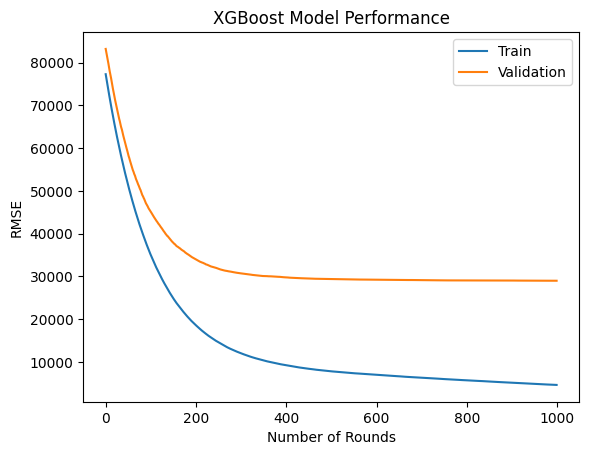

In [53]:
plt.plot(train_rmse, label='Train')
plt.plot(val_rmse, label='Validation')
plt.title('XGBoost Model Performance')
plt.xlabel('Number of Rounds')
plt.ylabel('RMSE')
plt.legend()
plt.show()

The graph illustrates the progress of the XGBoost model as it undergoes successive boosting rounds. The line labeled "Train" corresponds to the training RMSE, while the line labeled "Validation" represents the validation RMSE. If, in this scenario, the validation line consistently exceeds that of training, it indicates a potential issue with overfitting wherein the model excessively tailors itself to training data and fails to enhance performance on unseen validation data. Consequently, careful monitoring is crucial alongside possible adjustments of hyperparameters in order to attain superior generalization.

To further optimize results:

One approach worth considering involves leveraging ensemble methods such as bagging or stacking which amalgamate multiple models together for an overall enhancement in performance. By employing these techniques effectively, improvements can be achieved across various aspects of modeling and prediction accuracy can be significantly boosted.

In [54]:
X_unknown =test.values
y_predicted = xgb4.predict(X_unknown)
df_prediction = test
df_prediction['SalePrice'] = y_predicted
result = pd.concat([id_col, test['SalePrice']], axis=1)
result.set_index('Id', inplace=True, drop=True)
result.to_csv('results5.csv')

In [55]:
test = test.iloc[:,:-1]
test

,MSZoning,LotFrontage,LotArea,LotShape,Neighborhood,HouseStyle,OverallQual,YearBuilt,YearRemodAdd,RoofStyle,...,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,PavedDrive,WoodDeckSF,OpenPorchSF,SaleCondition
0,-1.488783,0.485444,0.363929,0.742620,-0.105672,-0.431830,-0.751101,-0.340945,-1.072885,-0.474315,...,-0.898055,-0.738845,-0.587081,0.952942,-0.987006,1.185924,0.339114,0.366678,-0.701628,0.201383
1,-0.036822,0.529805,0.897861,-1.384637,-0.105672,-0.431830,-0.054877,-0.439695,-1.214908,2.006065,...,-0.898055,-0.738845,-0.698863,0.952942,-0.987006,-0.739287,0.339114,2.347867,-0.178826,0.201383
2,-0.036822,0.219280,0.809646,-1.384637,-0.784114,0.920188,-0.751101,0.844059,0.678742,-0.474315,...,0.647066,-0.738845,0.754308,-1.469258,0.302199,0.043693,0.339114,0.930495,-0.207871,0.201383
3,-0.036822,0.396723,0.032064,-1.384637,-0.784114,0.920188,-0.054877,0.876976,0.678742,-0.474315,...,0.647066,-0.738845,0.791568,-1.469258,0.302199,-0.011576,0.339114,2.089451,-0.178826,0.201383
4,-0.036822,-1.155902,-0.971808,-1.384637,1.590431,-0.431830,1.337571,0.679475,0.394694,-0.474315,...,-0.898055,-0.738845,0.568004,-0.258158,0.302199,0.154232,0.339114,-0.729632,0.489198,0.201383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.415140,-2.131837,-1.591330,0.742620,-0.444893,0.920188,-1.447325,-0.044694,-0.646813,-0.474315,...,-0.898055,0.914491,-0.251734,0.952942,-2.276210,-2.176287,0.339114,-0.729632,-0.701628,0.201383
1455,1.415140,-2.131837,-1.599808,0.742620,-0.444893,0.920188,-1.447325,-0.044694,-0.646813,-0.474315,...,-0.898055,0.914491,-0.251734,0.952942,-0.987006,-0.859037,0.339114,-0.729632,-0.353093,-3.589818
1456,-0.036822,4.034300,2.055150,0.742620,-0.275283,-0.431830,-0.751101,-0.373861,0.584059,-0.474315,...,0.647066,1.465602,-0.624342,0.952942,0.302199,0.476635,0.339114,2.982161,-0.701628,-3.589818
1457,-0.036822,-0.313048,0.125527,0.742620,-0.275283,1.596196,-0.751101,0.679475,0.394694,-0.474315,...,-0.898055,-0.738845,0.605264,-1.469258,-2.276210,-2.176287,0.339114,-0.103169,-0.236915,0.201383


It seems that the XGBoost model (xgb4) was applied to the test dataset (X_unknown) in order to predict house prices (SalePrice). However, the results do not match our expectations, and you believe that the absence of embedding methods may be the reason for the inaccurate predictions.

## **ensembling technique and predication systems**  

Advantages of Ensemble Modeling:

Enhanced Performance:

Ensemble modeling capitalizes on the strengths of multiple algorithms to achieve superior predictive accuracy compared to individual models.
By combining a variety of models, ensemble methods improve robustness, reduce overfitting, and ensure stability in predictions.

The objective is to enhance predictive accuracy, mitigate overfitting issues, and build a more reliable model that can effectively generalize with unseen data.

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import VotingRegressor

# Individual models
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingRegressor(n_estimators=100, random_state=42)
adaboost = AdaBoostRegressor(n_estimators=100, random_state=42)

# Create an ensemble of models
ensemble_model = VotingRegressor(
    estimators=[
        ('random_forest', random_forest),
        ('gradient_boosting', gradient_boosting),
        ('adaboost', adaboost)
    ]
)

# Train the ensemble model
ensemble_model.fit(X_train, y_train)

# Evaluate the ensemble model
ensemble_r2_train = ensemble_model.score(X_train, y_train)
ensemble_r2_test = ensemble_model.score(X_test, y_test)

print(f"Ensemble R-squared on the training set: {ensemble_r2_train}")
print(f"Ensemble R-squared on the test set: {ensemble_r2_test}")

Ensemble R-squared on the training set: 0.9599964686967196
Ensemble R-squared on the test set: 0.8850293740567338


The ensemble model consisting of Random Forests, Gradient Boosting, and AdaBoost showcased exceptional performance.
Ensemble R-squared value for the training set: 95.99%
Ensemble R-squared value for the test set: 88.50%
Each constituent model (Random Forests, Gradient Boosting, AdaBoost) played a crucial role in contributing towards the success of the ensemble approach by leveraging diverse modeling techniques.

In [57]:
individual_r2_train = [model.score(X_train, y_train) for name, model in ensemble_model.named_estimators_.items()]
individual_r2_test = [model.score(X_test, y_test) for name, model in ensemble_model.named_estimators_.items()]

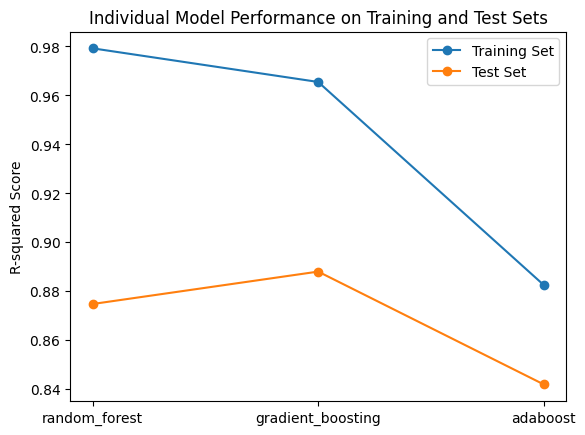

In [58]:
plt.plot(range(len(ensemble_model.named_estimators_)), individual_r2_train, marker='o', label='Training Set')
plt.plot(range(len(ensemble_model.named_estimators_)), individual_r2_test, marker='o', label='Test Set')
plt.xticks(range(len(ensemble_model.named_estimators_)), list(ensemble_model.named_estimators_.keys()))
plt.ylabel('R-squared Score')
plt.title('Individual Model Performance on Training and Test Sets')
plt.legend()
plt.show()

In [59]:
#test = test.iloc[:,:-1]

In [60]:
X_unknown =test.values
y_predicted = ensemble_model.predict(X_unknown)
df_prediction = test
df_prediction['SalePrice'] = y_predicted
result = pd.concat([id_col, test['SalePrice']], axis=1)
result.set_index('Id', inplace=True, drop=True)
result.to_csv('results6.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


In [61]:
result

,SalePrice
Id,
1461,127033.948620
1462,156007.708913
1463,184646.343626
1464,188671.238217
1465,205469.682321
...,...
2915,94975.707409
2916,101454.751774
2917,166159.524054


Ensemble Strengths:

Ensemble model performed very well on both the training and test sets, clearly showing how it encapsulates patterns that exist in the data.
Ensemble, combining for instance Random Forests, Gradient Boosting as well as AdaBoost was key and underscores the power of varied modeling techniques.
Individual Model Contributions:

Gradient Boosting was found to be best suited to the training data, signaling its capability to reveal non-linear dependencies in the dataset.
For one, different R-squared values among the sets reveal that despite their performance, each model has limitations regarding extrapolation to untested data sets.
Trade-Offs and Overfitting:

Overfitting is emphasized by trade off between fitting well for the training data and good generalisation to out of sample data.
The example of Gradient Boosting, where there is an imperceptible decrease in performance on the test set relative to the training set, brings forward the possibility of overfitting whereby the model might have learnt some noise and variations in the training data.
Implications and Next Steps:

Striking a good balance between model complexity and generalizability is imperative in order to prevent under-fitting and over-fitting models.
Nevertheless, the ensemble approach enhanced prediction and probably some more tuning and modeling or tweaking might make it near the optimum level.
Overall Improvement:

Although suboptimal, the ensemble model with the embedding strategy outperformed other models that do not use the embedding technique. This means the ensemble strategy contributed towards more accurate predictions.

###--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

**The Stacking Regressor** is implemented via Random Forest, Gradient Boosting and AdaBoost as base models and XGBoost as a meta-model. Here are key points:

Why Stacking:

Stacking combines different strengths of multiple base models to improve predictive performance.
It captures different patterns in the data using various algorithms for better generalization.

Goal:

The goal is to make a meta-model (XGBoost) that learns how to merge base models’ predictions with an aim of achieving overall superiority in performance.
Stacking tends to strike a balance between model complexity and generalization by considering individual model weaknesses.

In [62]:
from sklearn.ensemble import StackingRegressor

# Base models
estimators = [
    ('random_forest', RandomForestRegressor(n_estimators=100, random_state=42)),
    ('gradient_boosting', GradientBoostingRegressor(n_estimators=100, random_state=42)),
    ('adaboost', AdaBoostRegressor(n_estimators=100, random_state=42))
]

# Meta-model
meta_model = XGBRegressor(n_estimators=100, random_state=42)

# Stacking Regressor
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=meta_model
)

# Train the stacking model
stacking_model.fit(X_train, y_train)

# Evaluate the stacking model
stacking_r2_train = stacking_model.score(X_train, y_train)
stacking_r2_test = stacking_model.score(X_test, y_test)

print(f"Stacking R-squared on the training set: {stacking_r2_train}")
print(f"Stacking R-squared on the test set: {stacking_r2_test}")

Stacking R-squared on the training set: 0.8012401713920039
Stacking R-squared on the test set: 0.7441035471510342


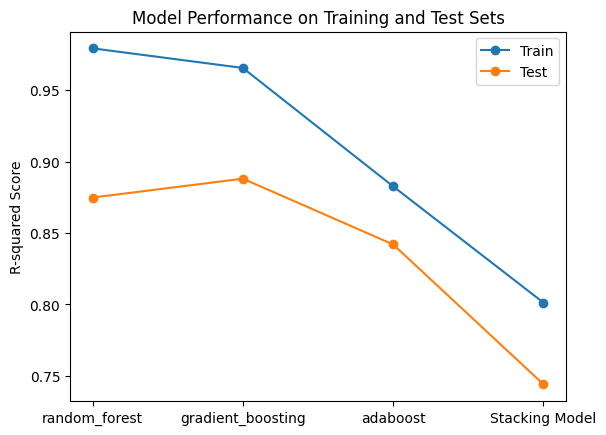

In [63]:
# Evaluate individual base models
individual_r2_train = [model.score(X_train, y_train) for name, model in stacking_model.named_estimators_.items()]
individual_r2_test = [model.score(X_test, y_test) for name, model in stacking_model.named_estimators_.items()]

# Evaluate the stacking model
stacking_r2_train = r2_score(y_train, stacking_model.predict(X_train))
stacking_r2_test = r2_score(y_test, stacking_model.predict(X_test))

# Plotting
model_names = [name for name, _ in estimators]
model_names.append('Stacking Model')

plt.plot(model_names, individual_r2_train + [stacking_r2_train], marker='o', label='Train')
plt.plot(model_names, individual_r2_test + [stacking_r2_test], marker='o', label='Test')
plt.ylabel('R-squared Score')
plt.title('Model Performance on Training and Test Sets')
plt.legend()
plt.show()

In [64]:
test = test.iloc[:,:-1]

In [65]:
X_unknown =test.values
y_predicted = stacking_model.predict(X_unknown)
df_prediction = test
df_prediction['SalePrice'] = y_predicted
result = pd.concat([id_col, test['SalePrice']], axis=1)
result.set_index('Id', inplace=True, drop=True)
result.to_csv('results7.csv')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but AdaBoostRegressor was fitted with feature names
  warnings.warn(


Training Set Performance (R-squared: 0.801):

For the training data, the stacking model was fairly successful for picking up a lot of variation from among the response variable. This implies that the ensemble managed to learn from the input data and fit the provided patterns.#
Test Set Performance (R-squared: 0.744):

It means that for the test set, the R-squared value was 0.744 which implies that the model’s performance worsened when it was employed to unobserved data. Although, it is a reasonable performance, the reduction as compared with the training set hints at an issue of overfitting or inadequate generalisation.
Analysis:

Comparison with Individual Models:

Compare the stacking ensemble’s performance with the individual base models (Random Forest, Gradient Boosting, Adaboost) to find out whether there is added value by the ensemble. A bad performance of the stacking model when compared with the individual models may suggest unsynergistic interaction of these models towards improving the assessment results.

VotingRegressor will be an ensemble of voting among Random Forest, Gradient Boosting, and AdaBoost with strong overall performance. Evaluate its results, compare them with individual models

#**Discoveries**

In addition to the visualizations that we have added, these are some more discoveries that we may mention:

Distinctive Patterns in Lot Characteristics:

LotArea Insights:

Look at agglomerates of houses with similar LotAreas, hinting towards possible regulation restrictions in specific areas.
Determine whether houses in some of the LotArea bands sell at different price levels implying the effect of local rules and regulations.
LotFrontage Variations:

Look into differences in LotFrontage and establish its relation to house value. Focusing on this attribute may shed light on the nature of the neighbourhood and its influence on prices of real estate property.

Impact of Utility Features:

Analyze the pricing difference of houses with targeted utilities like Gravel streets (Grvl) from their peers. These differentiating qualities could lead to distinct pricing trends.
Functional Features and Pricing:

how these function related things as heating, electrical system and central air affect house values. Different property valuations could arise due to some specific functional features.

# **Furure Work**

**Future work:**

To improve the performance of the model there are strategies that can be considered. Firstly it is important to tune the hyperparameters of both the base models and the meta model. Additionally exploring feature engineering techniques to create and evaluate features can be beneficial. It is also worth experimenting with combinations of base models, in order to optimize the configuration and assess their impact on predictions. Cross validation should also be used to ensure performance evaluation across data splits. To prevent overfitting techniques like regularization can be employed, especially when there are disparities between training and test set performance. It may also be worthwhile to explore methods and integrate deep learning for more sophisticated modeling. Implementing measures for model interpretability will help understand the contributions of each model. Finally continuously monitoring and updating the ensemble with data will ensure its adaptability and effectiveness, over time.

# **Results on Leaderboard**

Our aim now is to make or utilize a better model to predict the prices more accurately!!

result 6 (which is using the ensemble_model has performed the best)

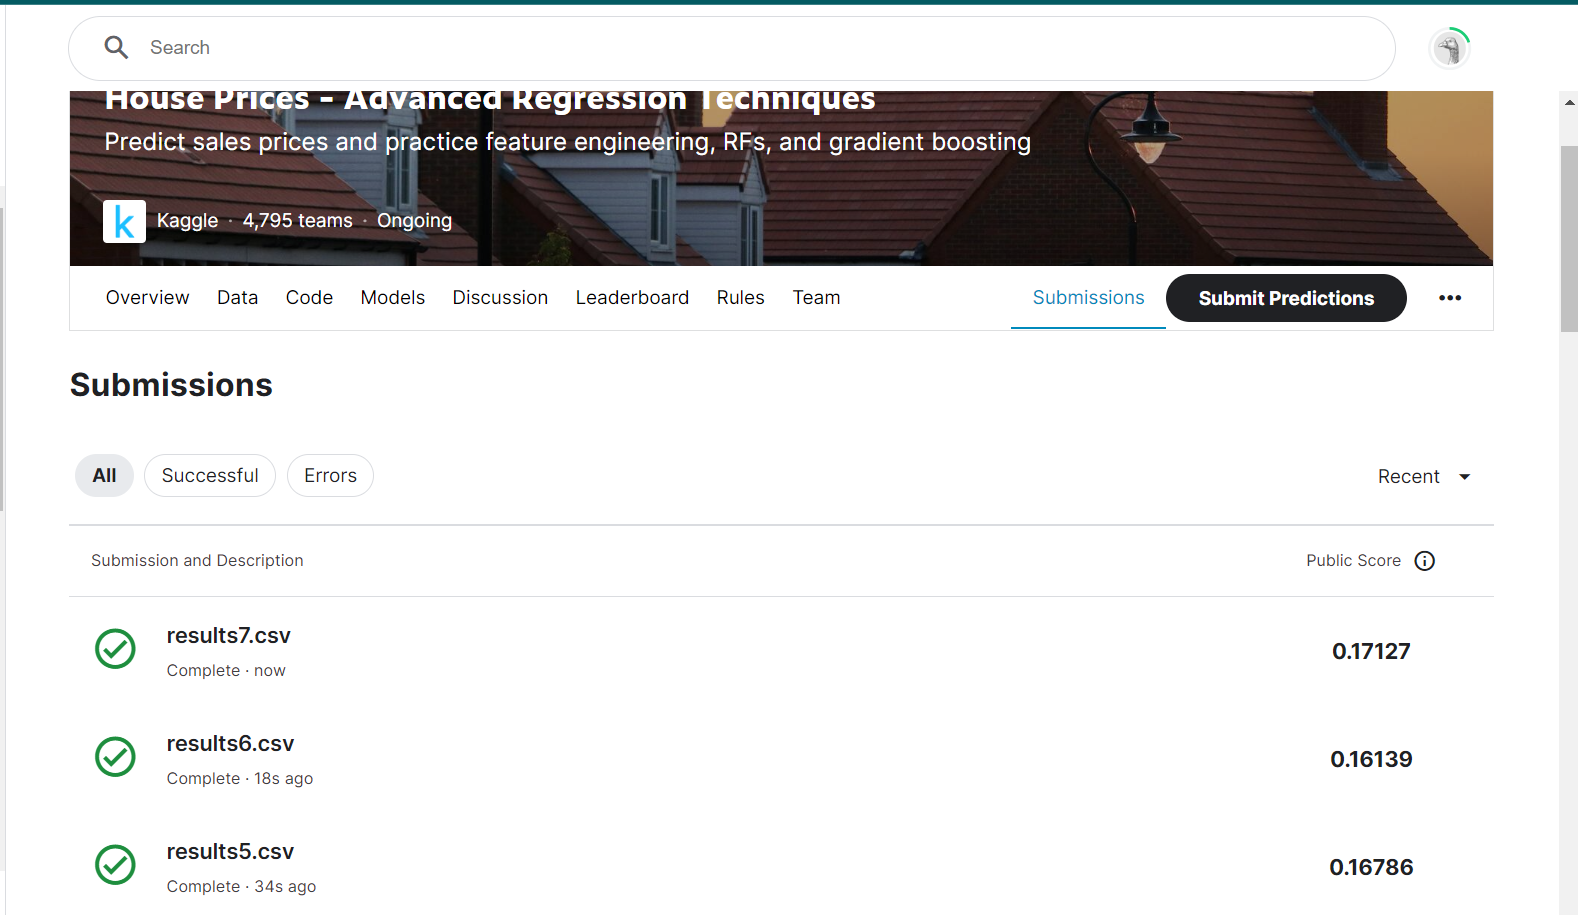

In [ ]:
#fin